<a href="https://colab.research.google.com/github/oscarvel821/cs482-assignments/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install kaggle
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oscarvelazquez","key":"ee492db3fee2a32067da5a39e71f3718"}'}

In [3]:
#create kaggle folder
! mkdir ~/.kaggle

In [4]:
#copy the kaggle.json to kaggle folder
! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#to list all the datasets in kaggle
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide            Covid Cases and Deaths WorldWide                     8KB  2023-02-01 12:22:51           1168         31  1.0              
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31          10834        354  1.0              
datascientistanna/customers-dataset                             Shop Customer Data                                  23KB  2023-02-07 18:42:21           1131         31  1.0              
themrityunjaypathak/most-subscribed-1000-youtube-channels       M

In [7]:
! kaggle datasets download -d new-york-city/nyc-east-river-bicycle-crossings

  0% 0.00/1.78k [00:00<?, ?B/s]
100% 1.78k/1.78k [00:00<00:00, 2.20MB/s]


In [8]:
! unzip nyc-east-river-bicycle-crossings.zip

Archive:  nyc-east-river-bicycle-crossings.zip
  inflating: nyc-east-river-bicycle-counts.csv  


In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
import seaborn as sns
import pandas as pd
from IPython.display import Image

##Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let xi
 be the binary random variable where xi = 1
 indicates approval. You can assume that 
 is distributed according to a Bernoulli distribution with parameter p = 1/2
.

Your job is to sample n = 50
 posts and estimate the approval rate of the CEO by considering the statistics of y = x1 + x2 + ... + xn
. What is the probability that 25 employees approve the CEO?

The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by n=0 and n=1 in which n=1 ("success") occurs with probability p and n=0 ("failure") occurs with probability q=1-p, where 0<p<1. It therefore has probability density function

Here we assume that the parameter p = 1/2

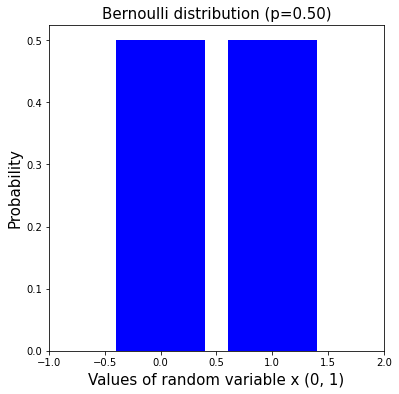

In [10]:
# Instance of Bernoulli distribution with parameter p = 0.50
bd=bernoulli(0.50)

# Outcome of random variable either 0 or 1
x=[0,1]

# For the visualization of the bar plot of Bernoulli's distribution
plt.figure(figsize=(6,6))
plt.xlim(-1, 2)
plt.bar(x, bd.pmf(x), color='blue')

# For labelling of Bar plot
plt.title('Bernoulli distribution (p=0.50)', fontsize='15')
plt.xlabel('Values of random variable x (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

Now that we are sampling 50 posts (n = 50), this becomes a binomial distribution problem.

We can use the formula:

\begin{align}
        \mathbf{P(x)} = \begin{pmatrix}
      n\\
      x
      \end{pmatrix} \mathbf{p^x} \mathbf{q}^{n - x} 
\end{align}

where \\
$n = 50 $ - Number of trials \\
$x = 25 $ - Number of times for a specific outcome within n trials \\
$p = 0.50 $ - Probability of success on a single trial \\
$p = 1 - p = 0.5 $ - Probability of failure on a single trial \\

Plugging everything into the formula we get:

\begin{align}
        \mathbf{P(X = 25)} = \begin{pmatrix}
      50\\
      25
      \end{pmatrix} \mathbf{0.5}^{25} \mathbf{0.5}^{50 - 25} \approx 0.1123
\end{align}

The probability that 25 employees approve the CEO is approximatly $11.23$%


##Question 1b (10 points)
Following your findings in Q1a, read about the Cenral Limit Theorem and recognize that
\begin{align}
        z = \frac{y \text{ } - \mu_y}{\sigma} 
\end{align}
 
is normally distributed with mean 0 and variance 1.

Can you find the probability that 25 employees approve the CEO using the Gaussian approximation?


In order to find the probablility that 25 employees approve the CEO using the Gaussian approximation, we first have to find the mean = $μ$ and the standard deviation = $\sigma$. \\
The expected value of the binomial distribution is:

\begin{align}
        E(x) = np
\end{align}

The standard deviation of the binomial distribution is:
\begin{align}
      \sqrt{V(x)} = \sqrt{np(1 - p)}
\end{align}

using the equations above and the values from part a, we get:

\begin{align}
       \mu = E(x) = 50 \cdot 0.5 = 25
\end{align}

\begin{align}
     \sigma = \sqrt{V(x)} = \sqrt{50 \cdot 0.50(1 - 0.50)} = \sqrt{12.5}
\end{align}

Approximate the probability that exactly 25 employees approve the CEO.

Using continuity correction,

\begin{align}
     P(X = 25) = P( 24.5 < X < 25.5)
\end{align}

This then becomes

\begin{align}
     \text{p value of } z \text{ when X = 25.5 - } \text{p value of } z \text{ when X = 24.5}
\end{align}

plugging in the values from above to abtain two p values

\begin{align}
        z = \frac{25.5 \text{ } - 25}{\sqrt{12.5}} = 0.14
\end{align} \\
\begin{align}
        z = \frac{24.5 \text{ } - 25}{\sqrt{12.5}} = -0.14 
\end{align} \\
The p value for z = 0.14 is 0.5557 and the p value for z = -0.14 is 0.4443 \\
Now finally using the Gaussian approximation the probability that 25 employees approve the CEO is :
\begin{align}
        0.5557 - 0.4443 ≈ 0.1114 ≈ 11.14\text{%}
\end{align} \\


##Question 2 (20 points)
A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1.

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ?

Urn 0 contains: one number zero ball and two number one balls. \\
urn 1 contains: five number zero balls and one number one balls. \\
 \\
Initially a fair coin is flipped to selected which urn is used; Urn 0 is used if the outcome is H (head) and Urn 1 is used if the outcome is T (tail) \\

\begin{align}
       P(H) = 1/2 = 0.5 \\
       P(T) = 1/2 = 0.5
\end{align} \\

Since there is replacement in this problem: \\

\begin{align}
       P(X_i = 0 | X_{i - 1} = 0) = 1/3 = 0.33 \\
       P(X_i = 1 | X_{i - 1} = 0) = 2/3 = 0.66 \\
       P(X_i = 0 | X_{i - 1} = 1) = 5/6 = 0.83 \\
       P(X_i = 1 | X_{i - 1} = 1) = 1/6 = 0.17\\
\end{align} \\

The specific sequence of the numbers on drawn balls being 0011 can be predicted using a markov chain:

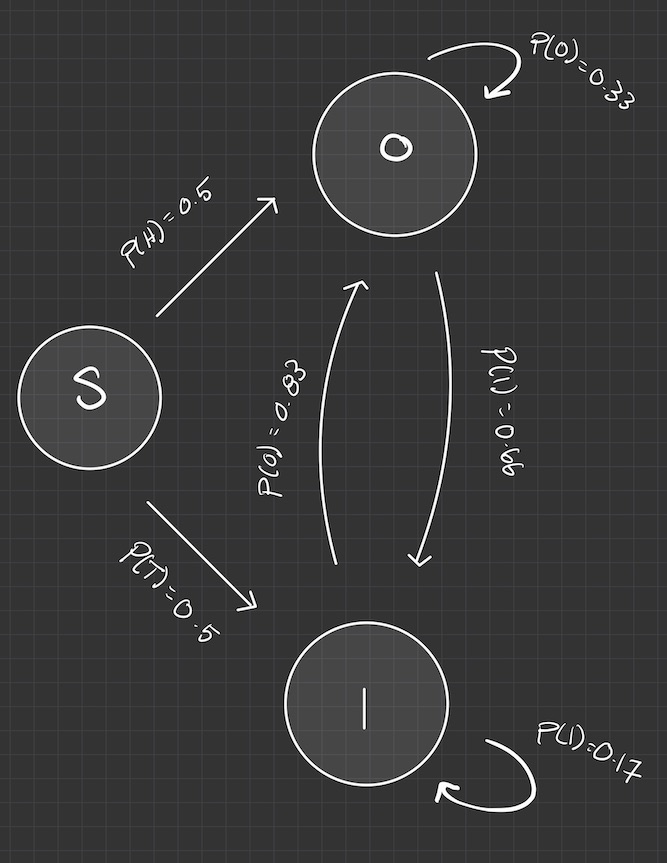

In [43]:
Image('/content/mark_chain.jpg')

Since the Markov chain is memoryless, the number of steps to the final $X_n$ doesnt matter. The only probability that matters is the the last $X_{n-1}$ in the sequence. So given the sequence 0011, where the number of steps is N = 4, it becomes:

\begin{align}
       P(X_4 = 1 | X_3 = 1 ) = ?
\end{align} \\

Look at the diagram above we can easily see that:
\begin{align}
       P(X_4 = 1 | X_3 = 1 ) = 0.17
\end{align} \\

##Question 3 (20 points)
Referring to Example 6.6 of the Math for ML book, simulate and plot the bivariate normal distribution with the shown parameters using the Cholesky factorization for the simulation.

Given parameters from example 6.6 of the Math for ML book:

\begin{align}
       μ = \begin{pmatrix}
      \mu_{x1}\\
      \mu_{x2} 
      \end{pmatrix} 
      = \begin{pmatrix}
    	\left[
         	\begin{array}{ccc}
         	0\\
         	2
        	\end{array}
    	\right]
      \end{pmatrix} \text{, Where μ is a 2 by 1 matrix}
\end{align} \\

\begin{align}
      Σ = \begin{pmatrix}
      V[X_1] , Cov(X_1, X_2)\\
      Cov(X_2, X_1), V[X_2] 
      \end{pmatrix} 
      =\begin{pmatrix}
      \sigma^2_{X1} , ρ \sigma^2_{X1}\sigma^2_{X2}\\
      ρ \sigma^2_{X2}\sigma^2_{X1}, \sigma^2_{X2}
      \end{pmatrix}
      =\begin{pmatrix}
      \left[
         	\begin{array}{ccc}
         	0.3 & -1\\
         	-1 & 5
        	\end{array}
    	\right]
      \end{pmatrix}
      \text{, Where Σ is a 2 by 2 matrix}
\end{align}

In order to simulate and plot the bivariate normal distribution with the shown parameters using the Cholesky factorization from example 6.6 of Math for Ml book, we can use the univariate normal distribution to help us sample $X_1$ and $X_2$. \\

The notation for univariate normal distribution:
\begin{align}
       X \sim N(\mu, \sigma^2)
\end{align} \\

By standardizating the the univariate normal distribution, we can then transform the general univariate normal distribution:
\begin{align}
       X \sim N(\mu, \sigma^2) \text{ to } Z \sim N(0, 1), where
\end{align} \\
\begin{align}
        Z = \frac{X \text{ } - \mu}{\sigma} 
\end{align} \\
Transforming the other way around is pretty simple now:

\begin{align}
        X = \mu + Z ⋅ σ
\end{align} \\

Bivariate normal distribution is very similiar to the information above, the notation for bivariate normal distribution: 
\begin{align}
       X \sim N(\mu, \Sigma) \text{, where μ and Σ are both matrix}
\end{align} \\
Transforming the standard to general bivariate normal distribution:

\begin{align}
       Z \sim N(0, I) \text{ to } X \sim N(\mu, Σ), where
\end{align} \\

\begin{align}
        X = \mu + Z ⋅ Σ^{1/2}
\end{align} \\

This is where using Cholesky factorization comes to play, we need the co-var and var matrix in one dimension. \\

From the numpy docs - \\
"Return the Cholesky decomposition, L * L.H, of the square matrix a, where L is lower-triangular and .H is the conjugate transpose operator (which is the ordinary transpose if a is real-valued)..." \\

Is just what we need to simulate and plot the birvariate normal distribution.

In [11]:
#The given mu matrix
mu = np.array([0,2])

#The given Sigma matrix
sigma = np.array([[0.3, -1], [-1, 5]])

#decomposing the sigma matrix
L = np.linalg.cholesky(sigma)

#generating a sample of 1000 bivariate normal distribution with a mean of 0
Z = np.random.standard_normal(size=(2000, 2))

#since L and Z shapes are not the same, we can use the dot product
X = mu + np.dot(Z, L)

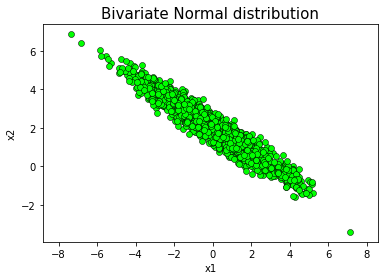

In [44]:
# Plotting the generated samples
plt.plot(X[:,0],X[:,1], 'o', c='lime',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.title('Bivariate Normal distribution', fontsize='15')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')


plt.show()

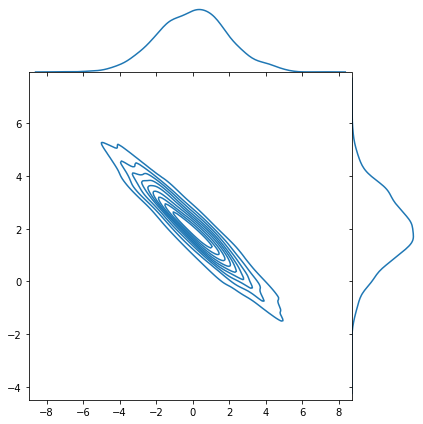

In [47]:
sns.jointplot(x=X[:,0], y=X[:,1], kind="kde", space=0)

##Question 4 (20 points)
Go through the provided links on Poisson and exponential distributions as the Math for ML textbook in your course site is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch.

<ol>

<li>Using the Kaggle API download this dataset and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.</li>

<li>Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.</li>

</ol>

In [14]:
df = pd.read_csv("/content/nyc-east-river-bicycle-counts.csv")

df

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471
...,...,...,...,...,...,...,...,...,...,...,...
205,205,2016-04-26 00:00:00,2016-04-26 00:00:00,60.1,46.9,0.24,1997.0,3520,4559.0,2929.0,13005
206,206,2016-04-27 00:00:00,2016-04-27 00:00:00,62.1,46.9,0,3343.0,5606,6577.0,4388.0,19914
207,207,2016-04-28 00:00:00,2016-04-28 00:00:00,57.9,48.0,0,2486.0,4152,5336.0,3657.0,15631
208,208,2016-04-29 00:00:00,2016-04-29 00:00:00,57.0,46.9,0.05,2375.0,4178,5053.0,3348.0,14954


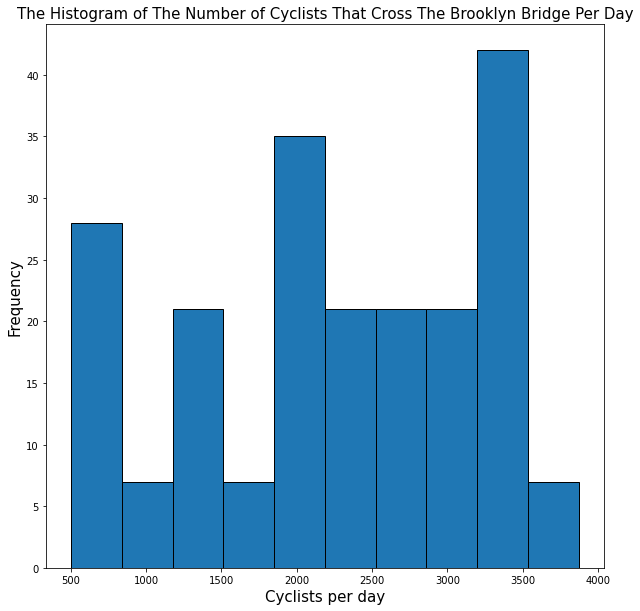

In [15]:
data = df['Brooklyn Bridge']

# For the visualization of the histogram
plt.figure(figsize=(10,10))

plt.hist(data, bins= 10, edgecolor="black")

plt.title("The Histogram of The Number of Cyclists That Cross The Brooklyn Bridge Per Day", fontsize='15')
plt.xlabel('Cyclists per day', fontsize='15')
plt.ylabel('Frequency', fontsize='15')
plt.show()


In [16]:
def poisson(lam):
  el, n, u = np.exp(-lam), 0, np.random.uniform(0,1)
  pp, fact, pow = el, 1, 1
  while u > pp:
    n = n + 1
    fact, pow = n * fact, lam * pow
    pp = pp + (pow / fact) * el

  return n

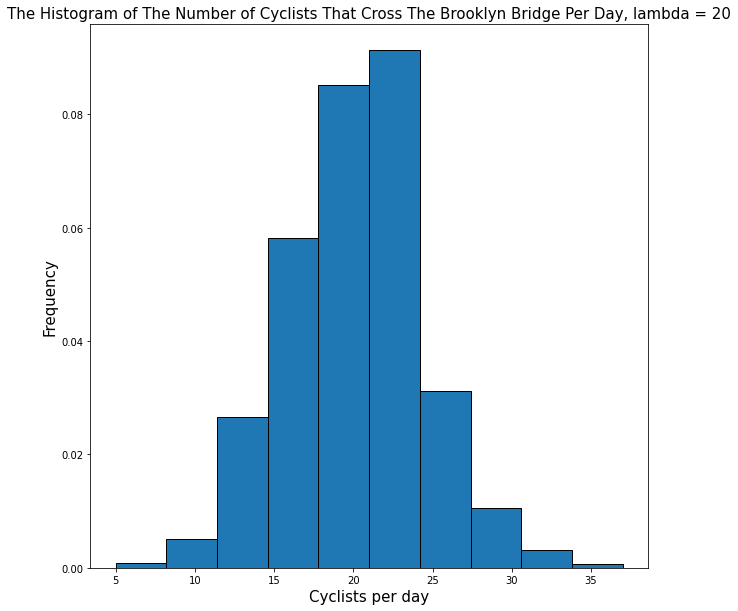

In [50]:
x = []
lamb = 20
for i in range(4000):
  x.append(poisson(lamb))
plt.figure(figsize=(10,10))

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')

plt.title(f"The Histogram of The Number of Cyclists That Cross The Brooklyn Bridge Per Day, lambda = {lamb}", fontsize='15')
plt.xlabel('Cyclists per day', fontsize='15')
plt.ylabel('Frequency', fontsize='15')

plt.show()

##Question 5 (20 points)
You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through this introductory page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue here. Make sure you click on the links and learn about the random process called Poisson process.

Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests λ = [1,3,4]
 and the service time of the requests as an exponential random variable with rate \mu = 4.

a lightly loaded system, which means that the mean job arrival rate 𝜆 is quite a bit lower than the mean service rate 𝜇.

The interarrival times are the times between successive jobs. The parameter 𝜆=1 means that on average, 1 jobs arrive per unit time. (The unit of time is totally arbitrary.) This means that the average interarrival time is 1/𝜆 = 1.0

In [18]:
def inverse_exp(lamb):
  return -np.log(1 - np.random.uniform()) / lamb

N = 1000
mean arrival rate = 1
mean service rate = 4
mean inter arrival time = 1.0
mean service time = 0.25
number of bins 1000.0
average wait time is 0.30878934818827486
N = 1000
mean arrival rate = 3
mean service rate = 4
mean inter arrival time = 0.3333333333333333
mean service time = 0.25
number of bins 333.3333333333333
average wait time is 0.7326113919674528
N = 1000
mean arrival rate = 4
mean service rate = 4
mean inter arrival time = 0.25
mean service time = 0.25
number of bins 250.0
average wait time is 16.909933780868453
N = 1000
mean arrival rate = 30
mean service rate = 4
mean inter arrival time = 0.03333333333333333
mean service time = 0.25
number of bins 33.333333333333336
average wait time is 113.65392373667518


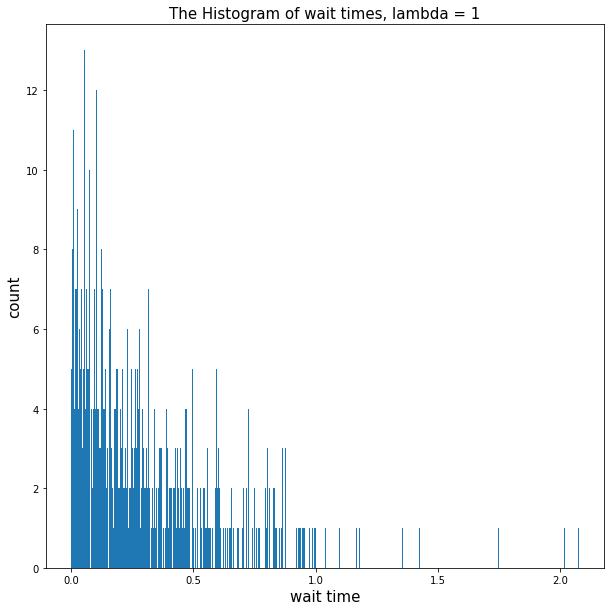

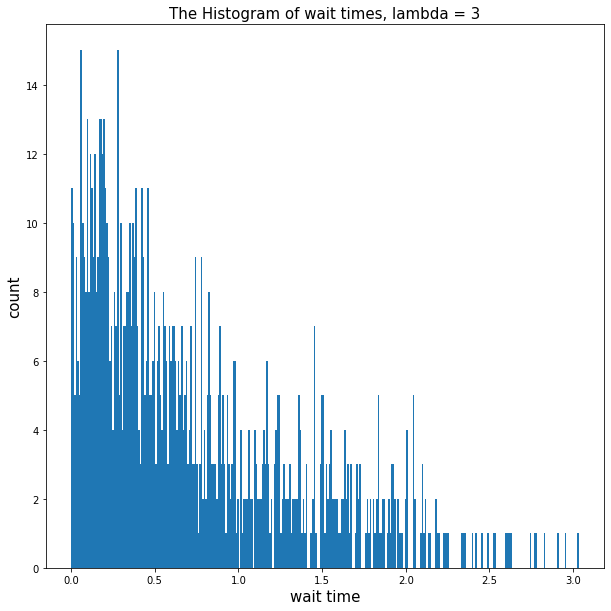

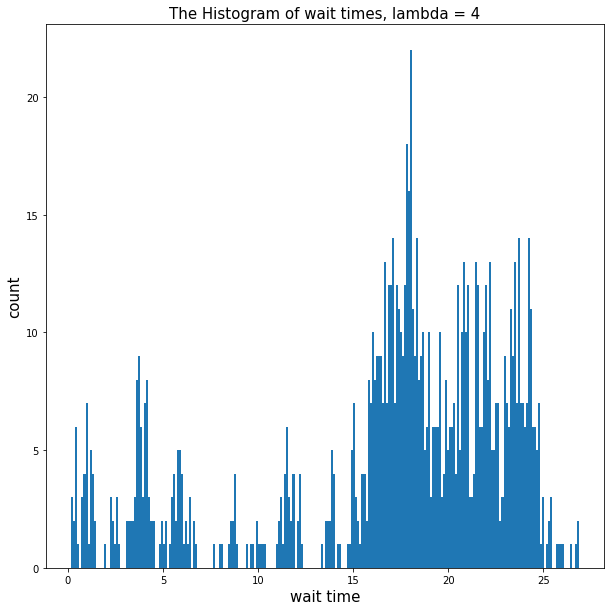

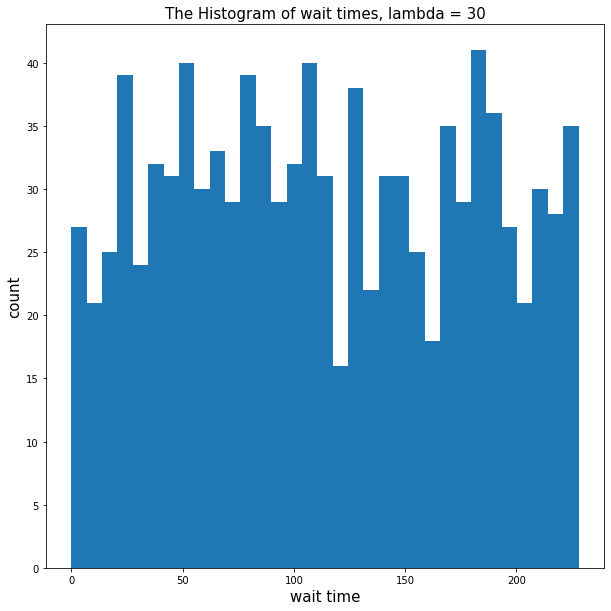

In [52]:
N = 1000

lambdas = [1, 3, 4]

mu = 4

for lamb in lambdas:
  num_bins = N / lamb
  print("N =", N)
  print("mean arrival rate =", lamb)
  print("mean service rate =", mu)
  print("mean inter arrival time =", 1/lamb)
  print("mean service time =", 1 / mu)
  print("number of bins", num_bins)

  # nxt_arrival = inverse_exp(lamb)
  nxt_arrival = 0

  nxt_service = nxt_arrival + inverse_exp(mu)

  q = []

  wait_time = []

  for _ in range(N):

    while nxt_arrival < nxt_service:
      q.append(nxt_arrival)
      nxt_arrival += inverse_exp(lamb)

    a = q[0]
    q.pop(0)
    wait_time.append(nxt_service - a)
    #print(f"wait time {_} =", nxt_service - a)

    if not q:
      nxt_service = nxt_arrival + inverse_exp(mu)
    else:
      nxt_service = nxt_service + inverse_exp(mu)
    
  print(f"average wait time is {sum(wait_time) / N}")

  # For the visualization of the histogram
  plt.figure(figsize=(10,10))

  plt.title(f"The Histogram of wait times, lambda = {lamb}", fontsize='15')
  plt.xlabel('wait time', fontsize='15')
  plt.ylabel('count', fontsize='15')

  plt.hist(wait_time, bins=int(num_bins))